# **K Means Clusterring**
K-Means clustering is an unsupervised machine learning algorithm that partitions unlabeled data points into distinct, non-overlapping clusters based on feature similarity. It works iteratively to minimize the sum of squared distances between data points and their cluster centroid (center of mass), making it an efficient method for tasks like customer segmentation and image compression. 

![](https://miro.medium.com/1*rAyjSZrMxEo3hzzX_jQaxA.png)

## Working

- #### Step 1: Initialise the value of *K*:
    The value of K signifies the **number of clusters**, it is important to choose a good value of K.

- #### Step 2: Choose centriods:
    Centrids are the central value (or means) of a cluster. But as in beginning we don't know any cluster so we initialise the centriods as random k values from the data. It is important to know that $ k = \text{Number of clusters} = \text{number of centriods} $.

- #### Step 3: Initialise groups:
    Now each and every data point will be grouped on the basis of eucladian distance from the centriods. A data point will be associated to the group whose centroid is nearest to it in terms of **eucladian distance**.

- #### Step 4: Update centroids:
    After the clusters are made, the centoids are updated. 
    $$ \text{New centroid} = \text{Mean of the data points in the cluster} $$

- #### Step 5: Repeat the process:
    Repeat the process of clustering until the centroids stop updating, if the new centroids are same as the old then data is divided into proper clusters. 

## How to select the value of *K*?

**Elbow method** is a technique used to choose the best number of clusters for K-Means clustering. The basic idea is to see how the inertia (cost) changes as we increase the number of clusters.

- Run K-Means for a range of K values: 
    Systematically run the K-Means clustering algorithm on your data for a range of possible values (e.g., from 1 to 10 or more).
- Calculate WCSS for each K: 
    For each run, calculate the Within-Cluster Sum of Squares (WCSS), also known as inertia. WCSS is the sum of the squared distances between each data point and the centroid of the cluster it belongs to.

    $$ WCSS = \sum_{i=1}^{k} (\sum_{j=1}^{n_{i}} dis(x_{j}^{i}, c_{i})) $$
    $$ dis(x_{j}^{i}, c_{i}) = \text{Eucledian distance of data point x and centoid of the cluster.} $$

- Plot the results: 
    Plot the number of clusters (K) on the x-axis and the corresponding WCSS value on the y-axis. Identify the "elbow" point: Visually inspect the graph for a point where the curve sharply bends, resembling an elbow.
- Select the optimal K: 
    The value at this elbow point is considered the optimal number of clusters because adding more clusters beyond this point does not significantly reduce the WCSS, indicating diminishing returns. 

It is widely used because it is simple to understand as we use visualization technique to see its "elbow structure". This structurer helps us to find its optimal value. Below we are using K=3 manually to see how elbow structure forms.

![](https://media.geeksforgeeks.org/wp-content/uploads/20241028173908396970/Elbow-Method.png)

## Implementation

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, n_features=2, centers=4, random_state=42)
X

array([[-8.55503989,  7.06461794],
       [-6.13753182, -6.58081701],
       [-6.32130028, -6.8041042 ],
       ...,
       [ 3.69047995,  4.60555175],
       [-7.48913939, -7.0670809 ],
       [-9.40049578,  7.11430104]])

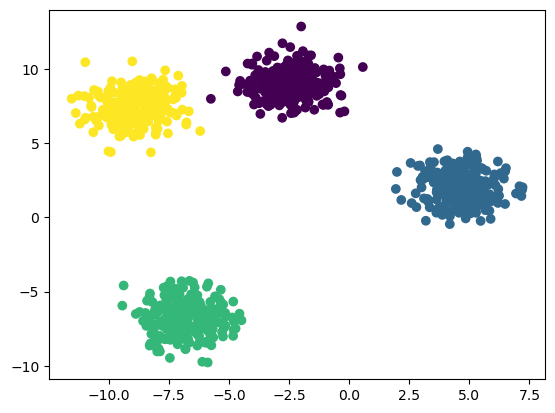

In [34]:
# visualise it
plt.scatter(X[:,0], X[:,1], c=y)

In [35]:
# standarising the data, and split it
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
# model training
from sklearn.cluster import KMeans

# also selecting K value (however it is seen that 4 will be optimal)
wcss = []
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

c:\Users\91977\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\91977\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\91977\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\91977\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

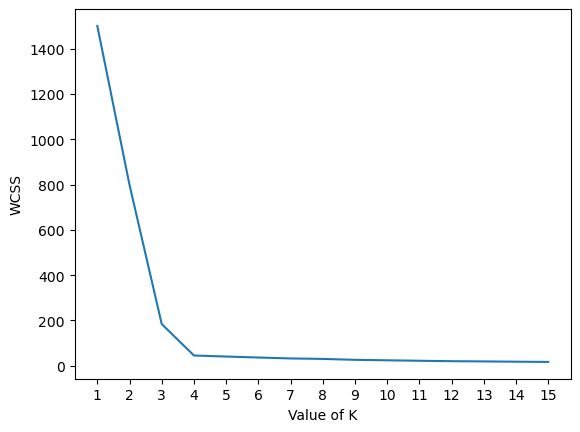

In [37]:
plt.plot(range(1, 16), wcss)
plt.xticks(range(1, 16))
plt.xlabel("Value of K")
plt.ylabel("WCSS")
plt.show()

The elbow point is 4, as we can see! (and also knew it)

In [38]:
# let's go with 4 as K value
kmeans = KMeans(n_clusters=4, init="k-means++")
kmeans.fit(X_train_scaled)

c:\Users\91977\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\91977\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=4)

In [39]:
y_pred = kmeans.predict(X_test_scaled)
y_pred

array([1, 0, 2, 1, 3, 0, 2, 3, 2, 3, 3, 1, 3, 3, 3, 0, 0, 2, 0, 0, 0, 3,
       1, 2, 2, 2, 0, 3, 1, 3, 0, 1, 1, 0, 1, 2, 1, 0, 3, 2, 3, 0, 0, 2,
       3, 0, 1, 1, 3, 0, 1, 3, 1, 1, 0, 2, 1, 1, 0, 2, 2, 3, 0, 2, 2, 3,
       3, 0, 0, 3, 3, 0, 0, 0, 2, 0, 0, 0, 0, 1, 3, 2, 0, 2, 0, 0, 2, 0,
       0, 2, 0, 0, 1, 0, 0, 0, 1, 3, 0, 2, 3, 3, 0, 3, 2, 0, 1, 3, 0, 2,
       1, 1, 3, 2, 2, 0, 3, 3, 1, 2, 2, 0, 3, 1, 2, 3, 3, 3, 2, 0, 1, 2,
       0, 2, 3, 0, 3, 3, 1, 1, 1, 3, 2, 2, 2, 2, 3, 0, 0, 2, 2, 1, 0, 2,
       3, 3, 0, 0, 2, 1, 2, 3, 0, 2, 3, 0, 2, 3, 2, 2, 2, 3, 0, 1, 1, 1,
       1, 1, 0, 1, 3, 2, 2, 1, 2, 2, 3, 1, 2, 2, 3, 3, 1, 0, 2, 3, 0, 1,
       2, 1, 1, 3, 2, 2, 3, 3, 3, 1, 0, 3, 3, 3, 0, 2, 0, 2, 1, 1, 0, 2,
       2, 2, 0, 1, 0, 2, 0, 3, 1, 3, 3, 1, 1, 0, 3, 2, 2, 1, 1, 0, 1, 1,
       2, 0, 0, 3, 3, 3, 1, 3])

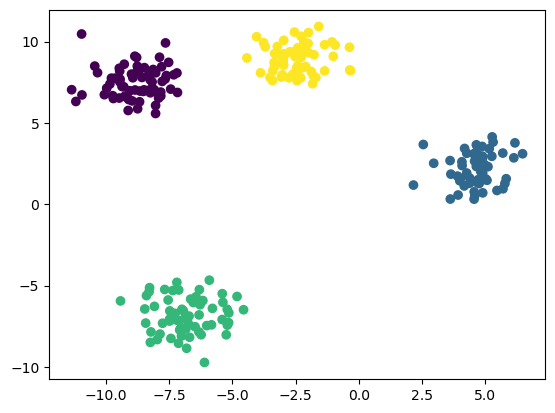

In [40]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)